Table of contents

1.Importing Dataset

2.Data Visualization:-
                      
                      1)Countplot

                      2)Pie chart

                      3)KDE plot
 
                      4)Violinplot

                      5)Boxplot

                      6)Hiistogram
                      
3.Detecting Outliers

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Importing Dataset**

In [2]:
df=pd.read_csv('../input/coursera-course-dataset/coursea_data.csv')
df.head(3)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k


**Countplot**

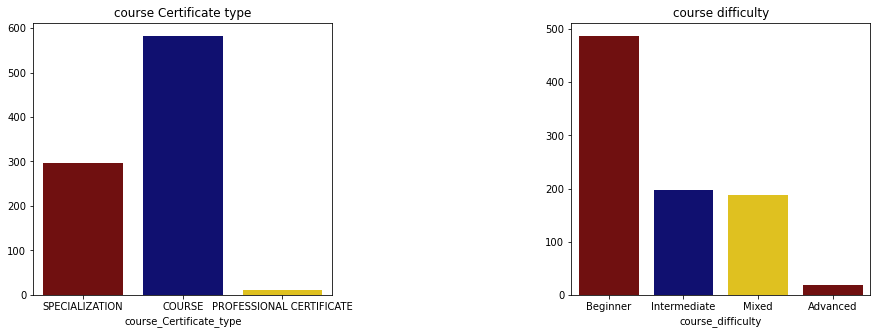

In [3]:
f,ax=plt.subplots(1,2,figsize=(15,5))
colours = ["maroon", "navy", "gold"]
sns.countplot('course_Certificate_type',ax=ax[0],data=df,palette=colours)
ax[0].set_title('course Certificate type')
ax[0].set_ylabel('')
sns.countplot('course_difficulty',ax=ax[1],data=df,palette=colours)
ax[1].set_title('course difficulty')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

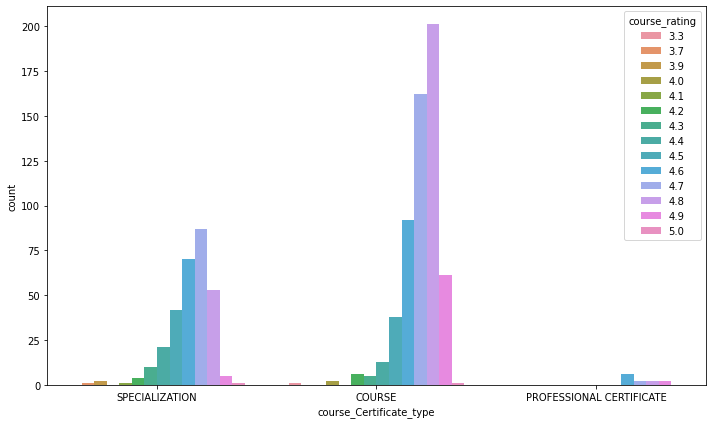

In [4]:
fig=plt.figure(figsize=(10,6))
sns.countplot('course_Certificate_type',data=df,hue='course_rating' )
plt.tight_layout()
plt.show()

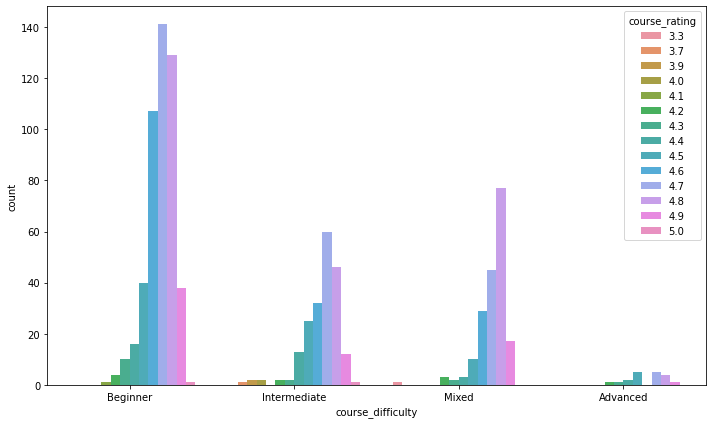

In [5]:
fig=plt.figure(figsize=(10,6))
sns.countplot('course_difficulty',data=df,hue='course_rating' )
plt.tight_layout()
plt.show()

**Droping first column**

In [6]:
df1=df.drop(['Unnamed: 0'], axis=1)

**KDE plot**

Text(0, 0.5, 'Probability Density')

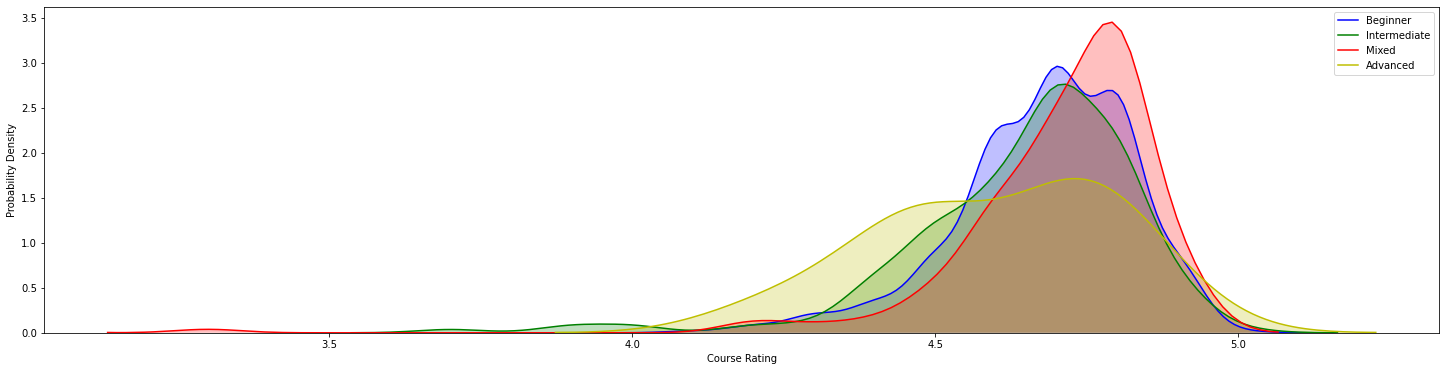

In [7]:
f,ax=plt.subplots(1,1,figsize=(25,6))
df['course_difficulty'].replace([0], 'Beginner', inplace=True) 
df['course_difficulty'].replace([1], 'Intermediate', inplace=True) 
df['course_difficulty'].replace([2], 'Mixed', inplace=True)
df['course_difficulty'].replace([3], 'Advanced', inplace=True)
sns.kdeplot(df.loc[(df['course_difficulty']=='Beginner'), 'course_rating'], color='b', shade=True, Label='Beginner')
sns.kdeplot(df.loc[(df['course_difficulty']=='Intermediate'), 'course_rating'], color='g', shade=True, Label='Intermediate')
sns.kdeplot(df.loc[(df['course_difficulty']=='Mixed'), 'course_rating'], color='r', shade=True, Label='Mixed')
sns.kdeplot(df.loc[(df['course_difficulty']=='Advanced'), 'course_rating'], color='y', shade=True, Label='Advanced')
plt.xlabel('Course Rating') 
plt.ylabel('Probability Density') 

**Violinplot**

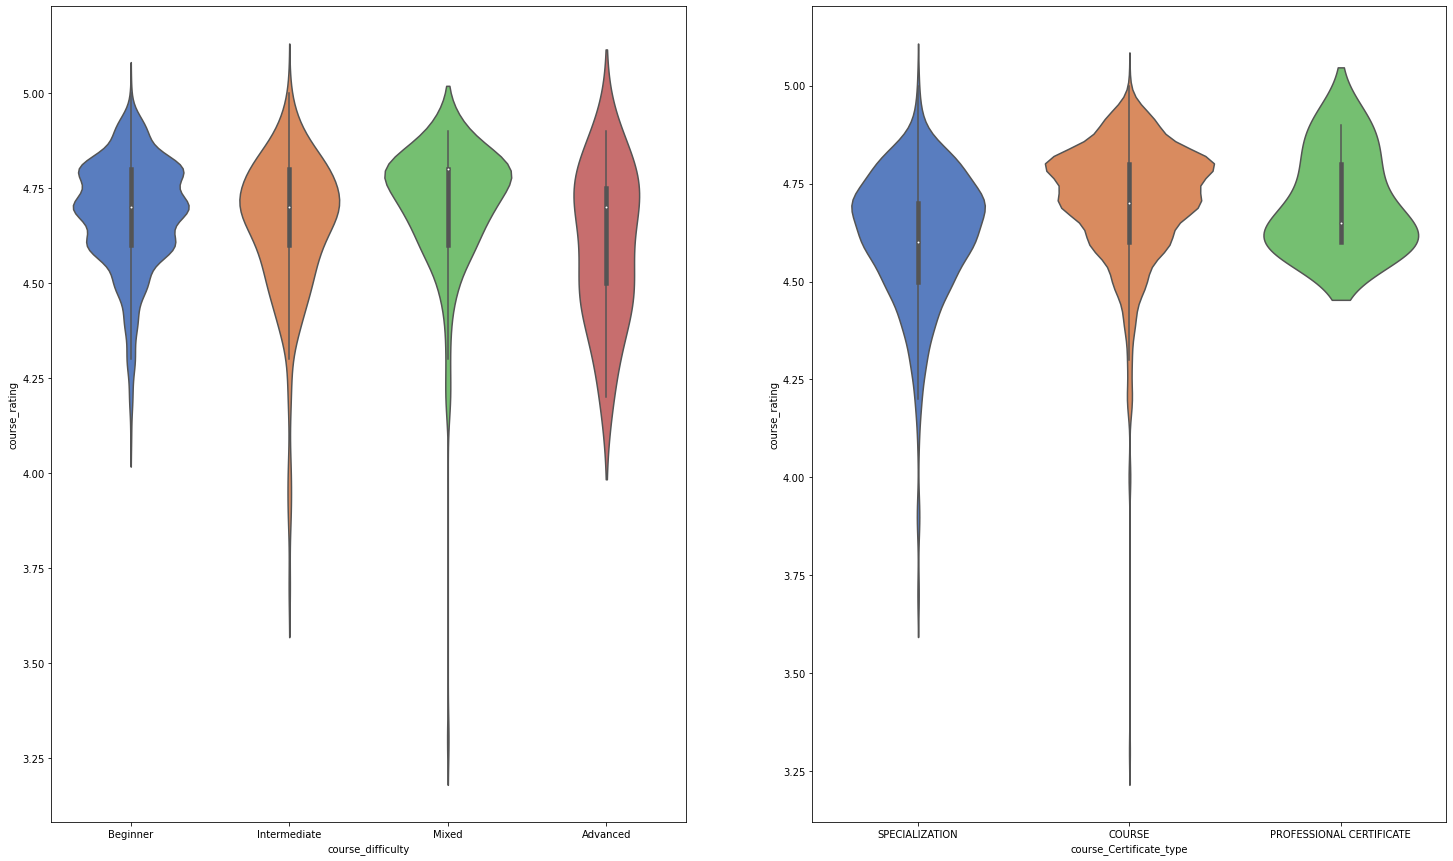

In [8]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.violinplot(x="course_difficulty", y="course_rating",ax=ax[0],data=df, palette="muted")
sns.violinplot(x="course_Certificate_type", y="course_rating",data=df,ax=ax[1], palette="muted")

**Boxplot**

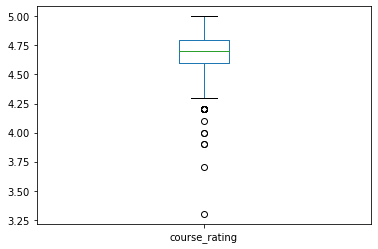

In [9]:
df1.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

**Histogram**

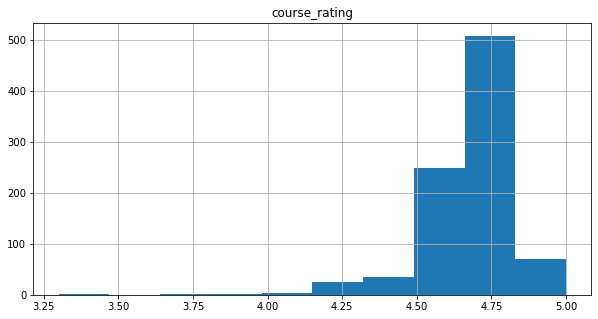

In [10]:
df1.hist (bins=10,figsize=(10,5))
plt.show ()

**Which university is offering more courses**

In [11]:
Johns_Hopkins_University=df["course_organization"].str.contains("Johns Hopkins University",case=False).value_counts(ascending=True).to_frame()
Yale_University=df["course_organization"].str.contains("Yale University",case=False).value_counts(ascending=True).to_frame()
University_of_Pennsylvania=df["course_organization"].str.contains("University of Pennsylvania",case=False).value_counts(ascending=True).to_frame()
Amazon_Web_Services=df["course_organization"].str.contains("Amazon Web Services",case=False).value_counts(ascending=True).to_frame()
deeplearning_ai=df["course_organization"].str.contains("deeplearning.ai",case=False).value_counts(ascending=True).to_frame()
IBM=df["course_organization"].str.contains("IBM",case=False).value_counts(ascending=True).to_frame()
Stanford_University=df["course_organization"].str.contains("Stanford University",case=False).value_counts(ascending=True).to_frame()
University_of_California_San_Diego=df["course_organization"].str.contains("University of California San Diego",case=False).value_counts(ascending=True).to_frame()
University_of_Virginia=df["course_organization"].str.contains("University of Virginia",case=False).value_counts(ascending=True).to_frame()
University_of_Michigan=df["course_organization"].str.contains("University of Michigan",case=False).value_counts(ascending=True).to_frame()
University_of_California=df["course_organization"].str.contains("University of California",case=False).value_counts(ascending=True).to_frame()
E_Learning_Development=df["course_organization"].str.contains("E-Learning Development Fund",case=False).value_counts(ascending=True).to_frame()
National_Research_University=df["course_organization"].str.contains("National Research University Higher School",case=False).value_counts(ascending=True).to_frame()

[Text(0, 0, 'Johns_Hopkins_University'),
 Text(0, 0, 'Yale_University'),
 Text(0, 0, 'University_of_Pennsylvania'),
 Text(0, 0, 'Amazon_Web_Services'),
 Text(0, 0, 'deeplearning_ai'),
 Text(0, 0, 'IBM'),
 Text(0, 0, 'Stanford_University'),
 Text(0, 0, 'University_of_California_San_Diego'),
 Text(0, 0, 'University_of_Virginia'),
 Text(0, 0, 'University_of_Michigan'),
 Text(0, 0, 'University_of_California'),
 Text(0, 0, 'E_Learning_Development'),
 Text(0, 0, 'National_Research_University')]

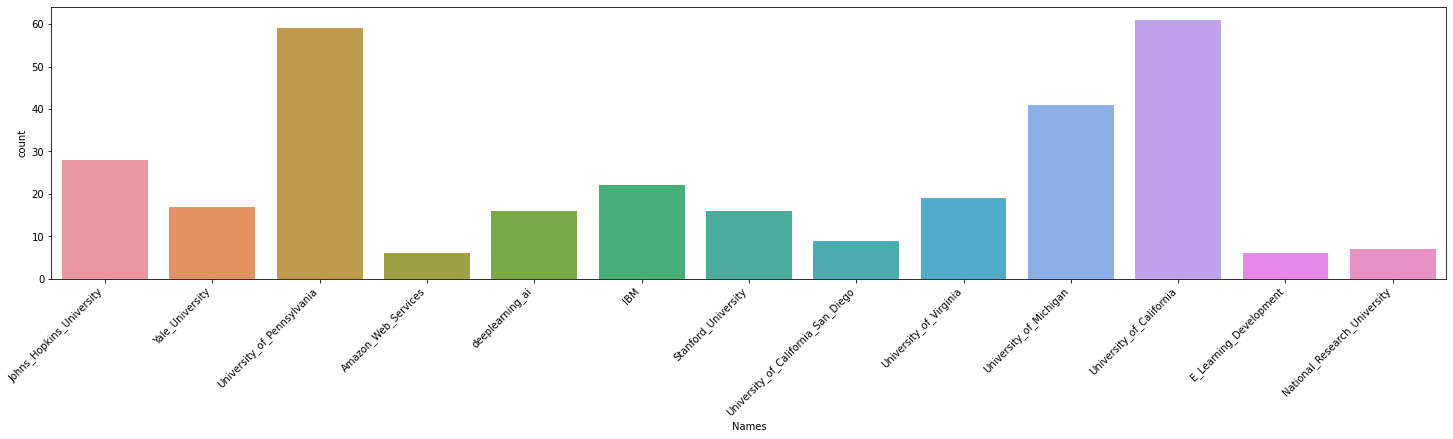

In [12]:
result = pd.concat([Johns_Hopkins_University,Yale_University,University_of_Pennsylvania,Amazon_Web_Services,deeplearning_ai,IBM, Stanford_University , University_of_California_San_Diego,University_of_Virginia,University_of_Michigan,University_of_California,E_Learning_Development,National_Research_University],axis=1).drop(index=0)
result_t=result.transpose()
result_t.columns=['count']
result_t.insert(0, "Names",["Johns_Hopkins_University","Yale_University","University_of_Pennsylvania","Amazon_Web_Services","deeplearning_ai","IBM","Stanford_University","University_of_California_San_Diego","University_of_Virginia","University_of_Michigan","University_of_California","E_Learning_Development","National_Research_University"], True)
f,ax=plt.subplots(1,1,figsize=(25,5))
ax = sns.barplot(x="Names", y = "count", data = result_t)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

**How many courses assigned to the particular section**

In [13]:
Causality=df["course_title"].str.contains("Causality",case=False).value_counts(ascending=True).to_frame()
Data_Science=df["course_title"].str.contains("Data Science",case=False).value_counts(ascending=True).to_frame()
Law=df["course_title"].str.contains("Law",case=False).value_counts(ascending=True).to_frame()
AI=df["course_title"].str.contains("AI",case=False).value_counts(ascending=True).to_frame()
AWS=df["course_title"].str.contains("AWS",case=False).value_counts(ascending=True).to_frame()
Statistics=df["course_title"].str.contains("Statistics",case=False).value_counts(ascending=True).to_frame()
Blockchain=df["course_title"].str.contains("Blockchain",case=False).value_counts(ascending=True).to_frame()
Big_Data=df["course_title"].str.contains("Big Data",case=False).value_counts(ascending=True).to_frame()
Programming=df["course_title"].str.contains("Programming",case=False).value_counts(ascending=True).to_frame()
python=df["course_title"].str.contains("python",case=False).value_counts(ascending=True).to_frame()
Data_Analysis=df["course_title"].str.contains("Data Analysis",case=False).value_counts(ascending=True).to_frame()
Data_Visualization=df["course_title"].str.contains("Data Visualization",case=False).value_counts(ascending=True).to_frame()
Health=df["course_title"].str.contains("Health",case=False).value_counts(ascending=True).to_frame()
English=df["course_title"].str.contains("English",case=False).value_counts(ascending=True).to_frame()
Excel=df["course_title"].str.contains("Excel",case=False).value_counts(ascending=True).to_frame()
Finance=df["course_title"].str.contains("Finance",case=False).value_counts(ascending=True).to_frame()
Web_Development=df["course_title"].str.contains("Web Development",case=False).value_counts(ascending=True).to_frame()
Cloud_Computing=df["course_title"].str.contains("Cloud Computing",case=False).value_counts(ascending=True).to_frame()
Psychology=df["course_title"].str.contains("Psychology",case=False).value_counts(ascending=True).to_frame()
Cyber_Security=df["course_title"].str.contains("Cyber Security",case=False).value_counts(ascending=True).to_frame()

[Text(0, 0, 'Causality'),
 Text(0, 0, 'Data_Science'),
 Text(0, 0, 'Law'),
 Text(0, 0, 'AI'),
 Text(0, 0, 'AWS'),
 Text(0, 0, 'Statistics'),
 Text(0, 0, 'Blockchain'),
 Text(0, 0, 'Big_Data'),
 Text(0, 0, 'Programming'),
 Text(0, 0, 'python'),
 Text(0, 0, 'Data_Analysis'),
 Text(0, 0, 'Data_Visualization'),
 Text(0, 0, 'Health'),
 Text(0, 0, 'English'),
 Text(0, 0, 'Excel'),
 Text(0, 0, 'Finance'),
 Text(0, 0, 'Web_Development'),
 Text(0, 0, 'Cloud_Computing'),
 Text(0, 0, 'Psychology'),
 Text(0, 0, 'Cyber_Security')]

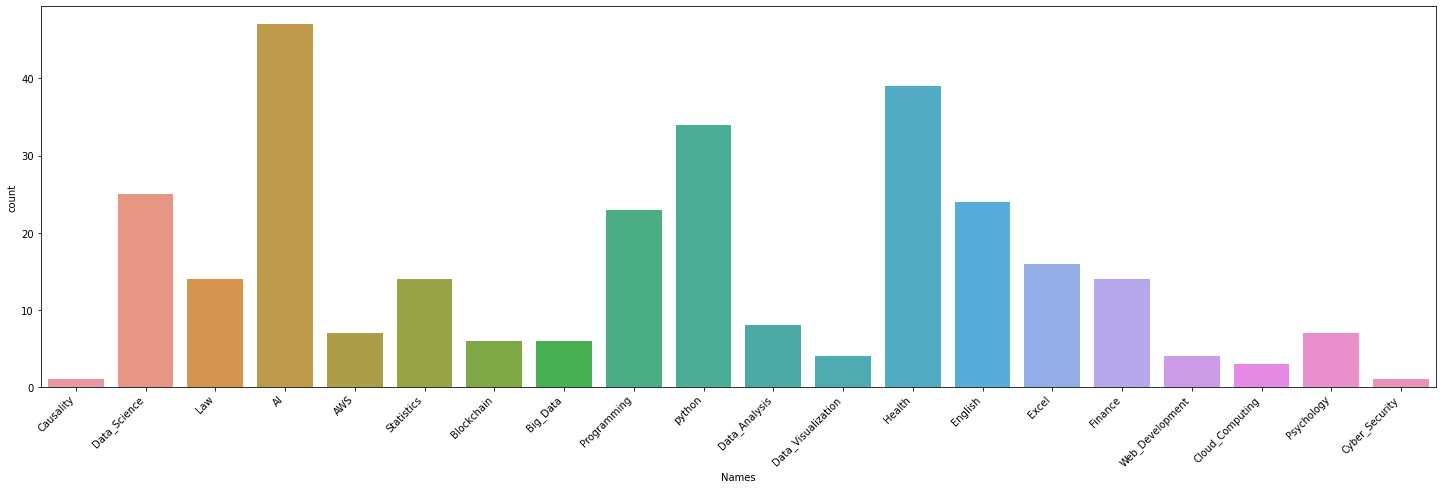

In [14]:
result = pd.concat([Causality,Data_Science,Law,AI,AWS,Statistics,Blockchain,Big_Data,Programming,python,Data_Analysis,Data_Visualization,Health,English,Excel,Finance,Web_Development,Cloud_Computing,Psychology,Cyber_Security],axis=1).drop(index=0)
result_t=result.transpose()
result_t.columns=['count']
result_t.insert(0, "Names",["Causality","Data_Science","Law","AI","AWS","Statistics","Blockchain","Big_Data","Programming","python","Data_Analysis","Data_Visualization","Health","English","Excel","Finance","Web_Development","Cloud_Computing","Psychology","Cyber_Security"], True)
f,ax=plt.subplots(1,1,figsize=(25,7))
ax = sns.barplot(x="Names", y = "count", data = result_t)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

**Wordcloud**

In [15]:
from wordcloud import WordCloud 

In [16]:
df1=df['course_title'].to_string()

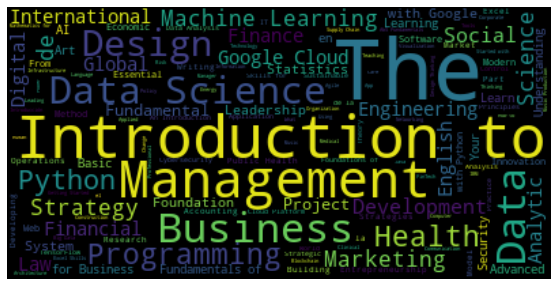

In [17]:
# Start with one review:
text = df1
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
f,ax=plt.subplots(1,1,figsize=(25,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Piechart**

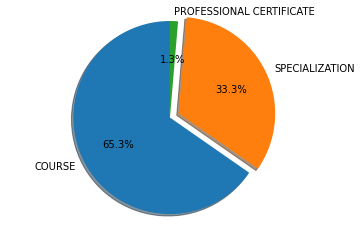

In [18]:
df1=df['course_Certificate_type'].value_counts()
data=['COURSE','SPECIALIZATION','PROFESSIONAL CERTIFICATE'] 
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(df1, explode=explode, labels=data, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

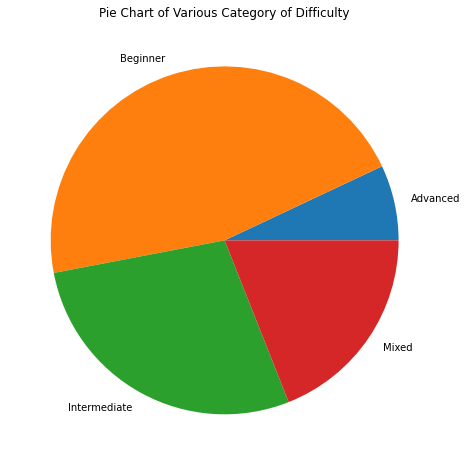

In [19]:
# Prepare Data
df1=df.head(100)
df2= df1.groupby('course_difficulty').size()
# Make the plot with pandas
df2.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Various Category of Difficulty")
plt.ylabel("")
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['course_Certificate_type']=le.fit_transform(df['course_Certificate_type'])
df['course_difficulty']=le.fit_transform(df['course_difficulty'])

In [22]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [23]:
X = df.drop(['Unnamed: 0','course_title','course_organization','course_students_enrolled','course_rating'],axis=1)
Y = df['course_rating']
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

**Linear Regression**

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X,Y)
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 4.714775262146369
betas = [-0.04534185 -0.00407728]


In [25]:
model.predict(X)

array([4.62001427, 4.7066207 , 4.70254342, 4.70254342, 4.70254342,
       4.71069798, 4.71069798, 4.7066207 , 4.62001427, 4.7066207 ,
       4.7066207 , 4.61593699, 4.62001427, 4.71069798, 4.71069798,
       4.71069798, 4.7066207 , 4.70254342, 4.62001427, 4.61593699,
       4.71069798, 4.70254342, 4.7066207 , 4.62001427, 4.70254342,
       4.71069798, 4.61593699, 4.62409155, 4.62409155, 4.62409155,
       4.71477526, 4.70254342, 4.71069798, 4.62001427, 4.71069798,
       4.71069798, 4.71069798, 4.7066207 , 4.61593699, 4.61593699,
       4.71069798, 4.71069798, 4.71069798, 4.62001427, 4.62001427,
       4.62001427, 4.7066207 , 4.71069798, 4.70254342, 4.62001427,
       4.70254342, 4.71477526, 4.71069798, 4.7066207 , 4.62001427,
       4.7066207 , 4.61593699, 4.7066207 , 4.7066207 , 4.62001427,
       4.70254342, 4.71069798, 4.61593699, 4.61593699, 4.62001427,
       4.66535613, 4.70254342, 4.70254342, 4.70254342, 4.70254342,
       4.71069798, 4.70254342, 4.7066207 , 4.70254342, 4.61593

In [26]:
new_X = [[3,2]]
print(model.predict(new_X))

[4.57059514]


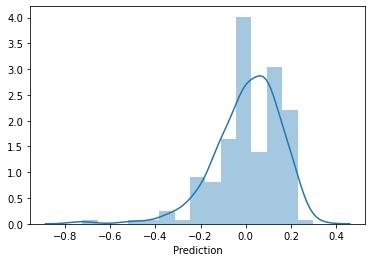

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
sns.distplot(y_test - predictions, axlabel="Prediction")
plt.show()